## Telecom Churn Case Study

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

#### Required Library and Options :

In [3]:
import pandas as pd
import numpy as np
import datetime as datetime
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from sklearn.datasets import make_classification
from numpy import where
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
#from pandas.api.types import is_string_dtype
#from pandas.api.types import is_numeric_dtype
pd.options.mode.chained_assignment = None #set it to None to remove SettingWithCopyWarning
#pd.options.display.float_format = '{:.4f}'.format #set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.set_option('display.max_columns', 250) # to display all the columns
pd.set_option('display.max_rows', 250) # to display all the columns
#np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})
warnings.filterwarnings('ignore')

In [4]:
telecom_churn_data = pd.read_csv("telecom_churn_data.csv")

In [5]:
telecom_churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [6]:
telecom_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [7]:
telecom_churn_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [8]:
telecom_churn_data.rename(columns={
                                   'jun_vbc_3g':'vbc_3g_6',
                                   'jul_vbc_3g':'vbc_3g_7',
                                   'aug_vbc_3g':'vbc_3g_8',
                                   'sep_vbc_3g':'vbc_3g_9',}, inplace=True)

2. Filter high-value customers

As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

 

After filtering the high-value customers, you should get about 29.9k rows.

In [9]:
def returncolumns(str):
    filter_col = [col for col in telecom_churn_data if str in col]
    return filter_col

In [10]:
telecom_churn_data[returncolumns("av_rech")] = telecom_churn_data[returncolumns("av_rech")].fillna(0, axis=1)
telecom_churn_data[returncolumns("total_rech")] = telecom_churn_data[returncolumns("total_rech")].fillna(0, axis=1)

In [11]:
telecom_churn_data['total_rech_amt_data_6'] = telecom_churn_data['av_rech_amt_data_6'] * telecom_churn_data['total_rech_data_6']
telecom_churn_data['total_rech_amt_data_7'] = telecom_churn_data['av_rech_amt_data_7'] * telecom_churn_data['total_rech_data_7']
telecom_churn_data['total_rech_amt_data_8'] = telecom_churn_data['av_rech_amt_data_8'] * telecom_churn_data['total_rech_data_8']
telecom_churn_data['total_rech_amt_data_9'] = telecom_churn_data['av_rech_amt_data_9'] * telecom_churn_data['total_rech_data_9']

In [12]:
telecom_churn_data_highVal = telecom_churn_data[
                    telecom_churn_data[['total_rech_amt_data_7','total_rech_amt_7','total_rech_amt_data_6','total_rech_amt_6']].mean(axis=1) 
                  >= telecom_churn_data[['total_rech_amt_data_7','total_rech_amt_7','total_rech_amt_data_6','total_rech_amt_6']].mean(axis=1).quantile(.70)]

In [13]:
telecom_churn_data_highVal

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,

3. Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9

In [14]:
def returncolumns(str):
    filter_col = [col for col in telecom_churn_data_highVal if str in col]
    return filter_col

In [15]:
telecom_churn_data_highVal[['total_ic_mou_9', 'total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00
8,34.91,142.18,0.00,0.00
21,252.61,1031.53,0.00,0.00
23,127.48,127.63,13.93,314.74
...,...,...,...,...
99981,391.63,64.21,0.00,0.00
99984,149.26,14.44,723.41,232.56
99986,547.11,1095.24,9.14,941.48
99988,265.84,182.16,0.05,393.34


In [16]:
def defineChurn(row):
    if row['total_ic_mou_9'] + row['total_og_mou_9'] + row['vol_2g_mb_9'] + row['vol_3g_mb_9'] > 0.0000 :
        return 0
    else:
        return 1

In [17]:
telecom_churn_data_highVal['churn'] = telecom_churn_data_highVal.apply (lambda row: defineChurn(row), axis=1)

In [18]:
telecom_churn_data_highVal['churn'].value_counts()

0    27560
1     2441
Name: churn, dtype: int64

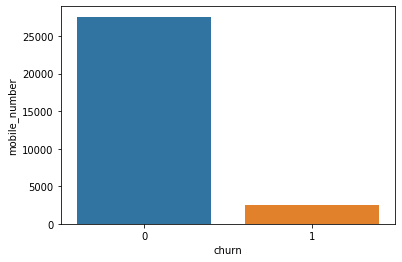

In [19]:
a = telecom_churn_data_highVal.groupby(['churn']).agg({'mobile_number':'count'}).reset_index()
sns.barplot(x=a['churn'], y=a['mobile_number'], data=a)

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names)

In [20]:
columns_to_drop = list(filter(lambda x: (x.endswith('_9')), telecom_churn_data_highVal.columns))

In [21]:
telecom_churn_data_highVal=telecom_churn_data_highVal.drop(columns_to_drop, axis=1)

In [22]:
telecom_churn_data_highVal.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'arpu_6', 'arpu_7',
       ...
       'fb_user_7', 'fb_user_8', 'aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6',
       'total_rech_amt_data_6', 'total_rech_amt_data_7',
       'total_rech_amt_data_8', 'churn'],
      dtype='object', length=175)

In [23]:
telecom_churn_data_highVal.shape

(30001, 175)

Drop the columns that has only one value in the columns 

In [24]:
unique_var_cols = []
for col in telecom_churn_data_highVal:
    if(len(telecom_churn_data_highVal.loc[:,col].dropna().unique()) == 1):
        unique_var_cols.append(col)
print(unique_var_cols)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [25]:
telecom_churn_data_highVal = telecom_churn_data_highVal.drop(unique_var_cols, axis=1)

In [26]:
telecom_churn_data_highVal.shape

(30001, 162)

telecom_churn_data_highVal.to_csv(r'telecom_churn_data_highVal.csv', index = False, header=True)

Let's look at the date columns that we have here 

In [27]:
for i in returncolumns("date"):
    print(i)
    print(telecom_churn_data_highVal[i].unique())

date_of_last_rech_6
['6/21/2014' '6/27/2014' '6/25/2014' '6/30/2014' '6/18/2014' '6/24/2014'
 '6/29/2014' '6/28/2014' '6/17/2014' nan '6/20/2014' '6/22/2014'
 '6/13/2014' '6/26/2014' '6/16/2014' '6/12/2014' '6/15/2014' '6/7/2014'
 '6/14/2014' '6/8/2014' '6/23/2014' '6/19/2014' '6/2/2014' '6/4/2014'
 '6/6/2014' '6/10/2014' '6/5/2014' '6/11/2014' '6/9/2014' '6/1/2014'
 '6/3/2014']
date_of_last_rech_7
['7/16/2014' '7/25/2014' '7/31/2014' '7/7/2014' '7/30/2014' '7/28/2014'
 '7/22/2014' '7/23/2014' '7/26/2014' '7/29/2014' '7/27/2014' '7/19/2014'
 '7/20/2014' '7/24/2014' '7/15/2014' '7/9/2014' '7/13/2014' '7/21/2014'
 nan '7/5/2014' '7/18/2014' '7/17/2014' '7/12/2014' '7/4/2014' '7/10/2014'
 '7/1/2014' '7/6/2014' '7/11/2014' '7/14/2014' '7/8/2014' '7/3/2014'
 '7/2/2014']
date_of_last_rech_8
['8/8/2014' '8/26/2014' '8/30/2014' '8/31/2014' '8/24/2014' '8/28/2014'
 '8/23/2014' '8/2/2014' '8/27/2014' '8/21/2014' '8/29/2014' '8/25/2014'
 '8/17/2014' '8/22/2014' '8/19/2014' nan '8/15/2014' '8/9/20

As we could see that monthly wise date column serves no purpose for the further analysis and hence we are removing them from the data set

In [28]:
telecom_churn_data_highVal = telecom_churn_data_highVal.drop(returncolumns("date"), axis=1)

In [29]:
telecom_churn_data_highVal.shape

(30001, 156)

As the below columns are created to identify the High-value customers, and we have the data with the avg column, we can drop these columns which are not necessary

In [30]:
returncolumns("total_rech_amt_data")

['total_rech_amt_data_6', 'total_rech_amt_data_7', 'total_rech_amt_data_8']

In [31]:
telecom_churn_data_highVal = telecom_churn_data_highVal.drop(returncolumns("total_rech_amt_data"), axis=1)

Let's look at the user related columns and it's unique values
 - There are records with nan which we are not aware whether the user has opted for the pack or not, let's create a new category -1 and fill in the missing values section

In [32]:
for i in returncolumns("user"):
    print(i)
    print(telecom_churn_data_highVal[i].unique())

night_pck_user_6
[ 0. nan  1.]
night_pck_user_7
[ 0. nan  1.]
night_pck_user_8
[ 0. nan  1.]
fb_user_6
[ 1. nan  0.]
fb_user_7
[ 1. nan  0.]
fb_user_8
[ 1. nan  0.]


Fill the missing values

In [33]:
missing_col_per = (round(100 * (telecom_churn_data_highVal.isnull().sum() /  telecom_churn_data_highVal.shape[0]),2))
missing_col_df = pd.DataFrame({'column_name': telecom_churn_data_highVal.columns,'missing_percent':missing_col_per}).reset_index(drop=True)
missing_col_df[missing_col_df['missing_percent'] > 0]

,column_name,missing_percent
4,onnet_mou_6,1.82
5,onnet_mou_7,1.79
6,onnet_mou_8,3.91
7,offnet_mou_6,1.82
8,offnet_mou_7,1.79
9,offnet_mou_8,3.91
10,roam_ic_mou_6,1.82
11,roam_ic_mou_7,1.79
12,roam_ic_mou_8,3.91
13,roam_og_mou_6,1.82


In [34]:
telecom_churn_data_highVal[returncolumns("user")] = telecom_churn_data_highVal[returncolumns("user")].fillna(-1, axis=1)

In [35]:
for i in returncolumns("user"):
    print(i)
    print(telecom_churn_data_highVal[i].unique())

night_pck_user_6
[ 0. -1.  1.]
night_pck_user_7
[ 0. -1.  1.]
night_pck_user_8
[ 0. -1.  1.]
fb_user_6
[ 1. -1.  0.]
fb_user_7
[ 1. -1.  0.]
fb_user_8
[ 1. -1.  0.]


In [36]:
print(telecom_churn_data_highVal[telecom_churn_data_highVal['total_rech_data_6'] == 0]['count_rech_2g_6'].unique())
print(telecom_churn_data_highVal[telecom_churn_data_highVal['total_rech_data_6'] == 0]['count_rech_3g_6'].unique())
print(telecom_churn_data_highVal[telecom_churn_data_highVal['total_rech_data_7'] == 0]['count_rech_2g_7'].unique())
print(telecom_churn_data_highVal[telecom_churn_data_highVal['total_rech_data_7'] == 0]['count_rech_3g_7'].unique())
print(telecom_churn_data_highVal[telecom_churn_data_highVal['total_rech_data_8'] == 0]['count_rech_2g_8'].unique())
print(telecom_churn_data_highVal[telecom_churn_data_highVal['total_rech_data_8'] == 0]['count_rech_3g_8'].unique())
print(telecom_churn_data_highVal[telecom_churn_data_highVal['total_rech_data_8'] == 0]['av_rech_amt_data_8'].unique())

[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[0.]


Fill with respect to the total_data_rech values is zero
 - From the above analysis we can directly fill the count of 2g and 3g recharges to zero as we can see whenever the total recharges are zero it has unique value as nan
 - For all the total number of recharges are zero for 8th Month and hence average_rech_amt_data_8 should also be filled with zero

In [37]:
returncolumns("count_rech")

['count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8']

In [38]:
telecom_churn_data_highVal[returncolumns("count_rech")] = telecom_churn_data_highVal[returncolumns("count_rech")].fillna(0, axis=1)

In [39]:
print(telecom_churn_data_highVal[telecom_churn_data_highVal['total_rech_data_6'] == 0]['max_rech_data_6'].unique())
print(telecom_churn_data_highVal[telecom_churn_data_highVal['total_rech_data_7'] == 0]['max_rech_data_7'].unique())
print(telecom_churn_data_highVal[telecom_churn_data_highVal['total_rech_data_8'] == 0]['max_rech_data_8'].unique())

[nan]
[nan]
[nan]


In [40]:
returncolumns("max_rech_data")

['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']

In [41]:
telecom_churn_data_highVal[returncolumns("max_rech_data")] = telecom_churn_data_highVal[returncolumns("max_rech_data")].fillna(0, axis=1)

As most of the columns which has high % missing values are filled with respect to the reasons above, we can also fill the remaining with lesser percentage of values also with zero

In [42]:
telecom_churn_data_highVal[np.array(missing_col_df[missing_col_df['missing_percent'] > 0]['column_name'])] = telecom_churn_data_highVal[np.array(missing_col_df[missing_col_df['missing_percent'] > 0]['column_name'])].fillna(0, axis=1)

In [43]:
missing_col_per = (round(100 * (telecom_churn_data_highVal.isnull().sum() /  telecom_churn_data_highVal.shape[0]),2))
missing_col_df = pd.DataFrame({'column_name': telecom_churn_data_highVal.columns,'missing_percent':missing_col_per}).reset_index(drop=True)
missing_col_df[missing_col_df['missing_percent'] > 0]

,column_name,missing_percent


In [44]:
telecom_churn_data_highVal.shape

(30001, 153)

### Univariate, Bivariate Analysis and Derived Features

##### Trend of the Total Amount recharged by the customers

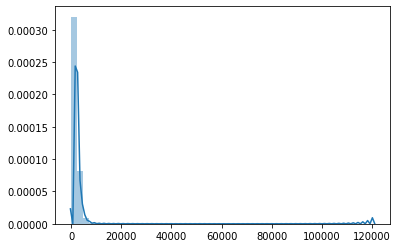

In [45]:
sns.distplot((telecom_churn_data_highVal['total_rech_amt_6']+telecom_churn_data_highVal['total_rech_amt_7']+telecom_churn_data_highVal['total_rech_amt_8']))

##### Trend with respect to the calls made with in the network

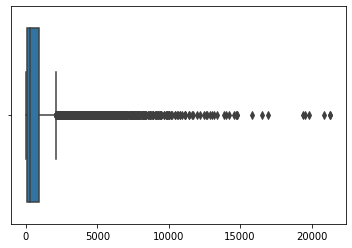

In [46]:
sns.boxplot((telecom_churn_data_highVal['onnet_mou_6']+telecom_churn_data_highVal['onnet_mou_7']+telecom_churn_data_highVal['onnet_mou_8']))

##### Trend with respect to the total minutes used for the outgoing

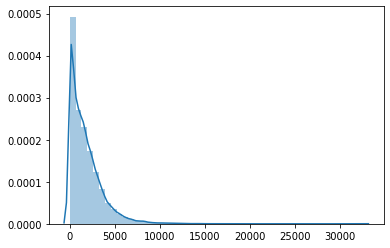

In [47]:
sns.distplot(telecom_churn_data_highVal['total_og_mou_6']+telecom_churn_data_highVal['total_og_mou_7']+telecom_churn_data_highVal['total_og_mou_8'])

#####  Trend with respect to the number of recharges made for the 2g and 3g by the customers for the data

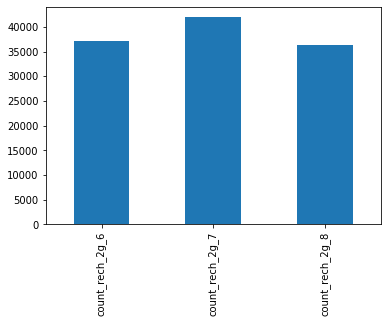

In [48]:
(telecom_churn_data_highVal[['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8']].sum()).plot(kind='bar')

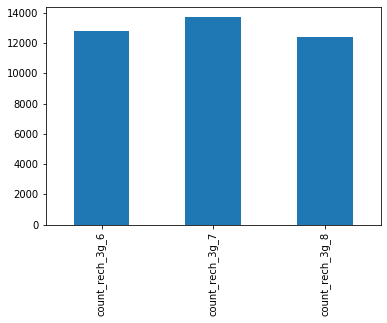

In [49]:
(telecom_churn_data_highVal[['count_rech_3g_6','count_rech_3g_7','count_rech_3g_8']].sum()).plot(kind='bar')

##### Trend of the outgoing calls per month with respect to churned and Non-churned customers
As we can see there is a drop in the outgoing of the customer calls month by month

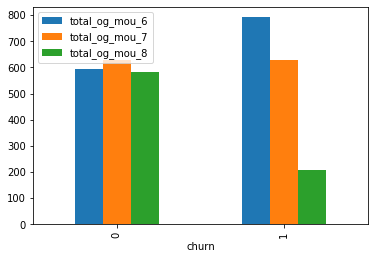

In [50]:
telecom_churn_data_highVal.groupby('churn')['total_og_mou_6','total_og_mou_7','total_og_mou_8'].mean().plot(kind='bar')

##### Trend of the incoming calls per month with respect to churned and Non-churned customers
As we can see there is a drop in the incoming of the customer calls month by month

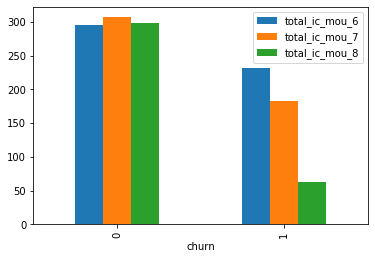

In [51]:
telecom_churn_data_highVal.groupby('churn')['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'].mean().plot(kind='bar')

##### Trend with respect to the amount of recharges done by the customers monthwise

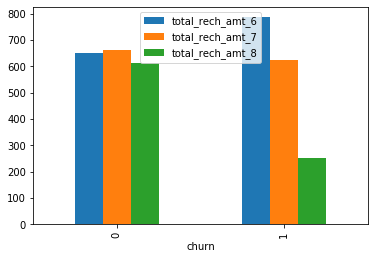

In [52]:
telecom_churn_data_highVal.groupby('churn')['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'].mean().plot(kind='bar')

##### Trend with respect to the std outgoing calls made by the churn and Non-Churn Customers

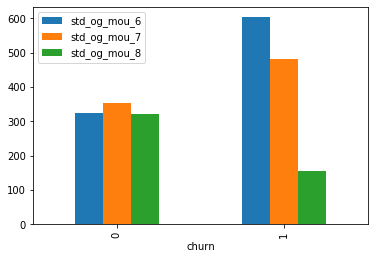

In [53]:
telecom_churn_data_highVal.groupby('churn')['std_og_mou_6','std_og_mou_7','std_og_mou_8'].mean().plot(kind='bar')

##### Trend with respect to the local outgoing calls made by the churn and Non-Churn Customers

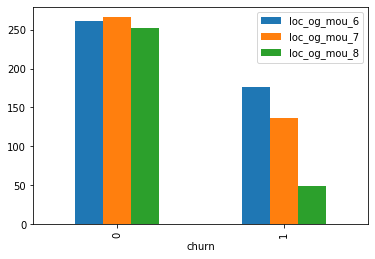

In [54]:
telecom_churn_data_highVal.groupby('churn')['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8'].mean().plot(kind='bar')

##### 2G and 3G data volume usage trends with respect to the monthwise by the churned and non-churned customers

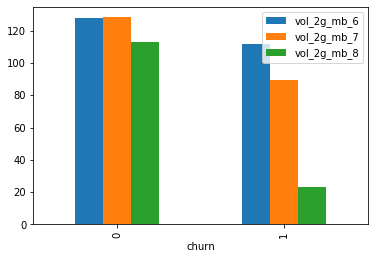

In [55]:
telecom_churn_data_highVal.groupby('churn')['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8'].mean().plot(kind='bar')

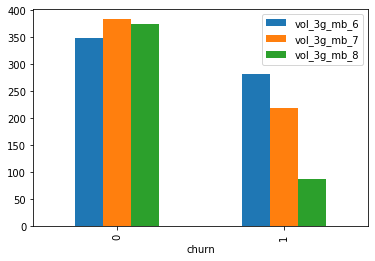

In [56]:
telecom_churn_data_highVal.groupby('churn')['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'].mean().plot(kind='bar')

##### Trend of the calls made to the customer care month wise by the churned and non-churned users

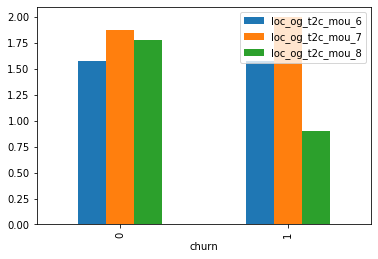

In [57]:
telecom_churn_data_highVal.groupby('churn')['loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8'].mean().plot(kind='bar')

##### Monthwise Average Revenue Trend with respect to the churned and non-churned customers

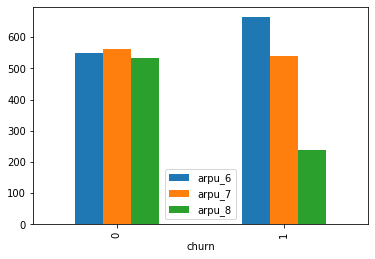

In [58]:
telecom_churn_data_highVal.groupby('churn')['arpu_6','arpu_7','arpu_8'].mean().plot(kind='bar')

##### Create Bins for Age on Network

In [59]:
telecom_churn_data_highVal['aon'].describe()
bins_2 = [0,900,1800,2700, 3600, 4500]
slot_2 = ['900','1800','2700','3600','4500']
telecom_churn_data_highVal['aon_range'] = pd.cut(telecom_churn_data_highVal['aon'], bins_2, labels=slot_2)

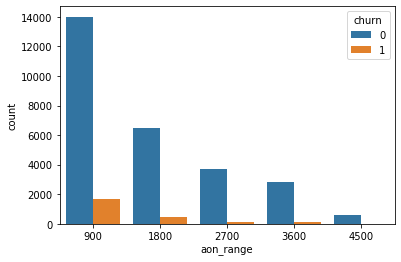

In [60]:
sns.countplot(data =telecom_churn_data_highVal, x='aon_range', hue='churn')
plt.show()

##### Trend of churn and Non-Churn customers with respect to the Age on the Network
We can clearly see that whose Age on network is less there are high chances of being churned

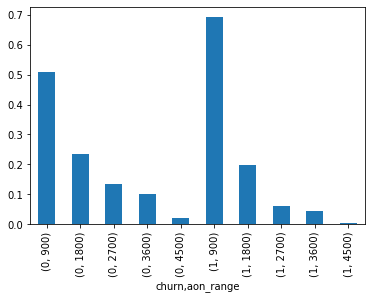

In [61]:
(telecom_churn_data_highVal.groupby(['churn','aon_range'])['aon_range'].count()/telecom_churn_data_highVal.groupby('churn')['aon_range'].count()).plot(kind='bar')

##### Trend based on the outgoing calls usage wise plotting
As we can see that the customers who are making std calls are having high churn ratio as when compared to local calls.

In [62]:
def usagestdorlocal(row):
    if ((row['loc_og_mou_6']+row['loc_og_mou_7']+row['loc_og_mou_8'] > row['std_og_mou_6']+row['std_og_mou_7']+row['std_og_mou_8'])):
        return "0"
    else:
        return "1"

In [63]:
telecom_churn_data_highVal['usage_loc_std'] = telecom_churn_data_highVal.apply(lambda row: usagestdorlocal(row), axis=1)

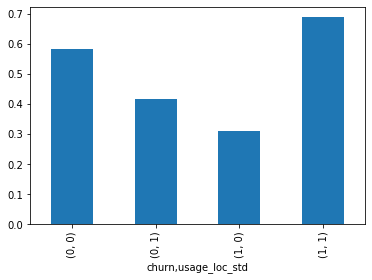

In [64]:
(telecom_churn_data_highVal.groupby(['churn','usage_loc_std'])['usage_loc_std'].count()/telecom_churn_data_highVal.groupby('churn')['usage_loc_std'].count()).plot(kind='bar')

##### Monthwise per recharge Amount
 - As we see the trend with respect to churn users, the per recharge amount is gradually decreasing month by month.

In [65]:
telecom_churn_data_highVal['amt_per_rech_6'] = ((telecom_churn_data_highVal['total_rech_amt_6']/telecom_churn_data_highVal['total_rech_num_6']) + telecom_churn_data_highVal['av_rech_amt_data_6'])/2
telecom_churn_data_highVal['amt_per_rech_7'] = ((telecom_churn_data_highVal['total_rech_amt_7']/telecom_churn_data_highVal['total_rech_num_7']) + telecom_churn_data_highVal['av_rech_amt_data_7'])/2
telecom_churn_data_highVal['amt_per_rech_8'] = ((telecom_churn_data_highVal['total_rech_amt_8']/telecom_churn_data_highVal['total_rech_num_8']) + telecom_churn_data_highVal['av_rech_amt_data_8'])/2

In [66]:
telecom_churn_data_highVal[returncolumns('amt_per_rech')] = telecom_churn_data_highVal[returncolumns('amt_per_rech')].fillna(0, axis=1)

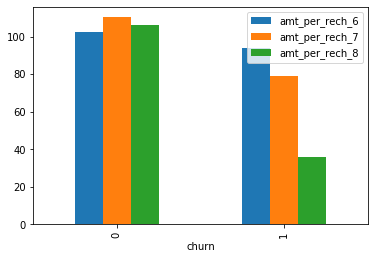

In [67]:
telecom_churn_data_highVal.groupby('churn')['amt_per_rech_6','amt_per_rech_7','amt_per_rech_8'].mean().plot(kind='bar')

In [68]:
def usageRatio(row):
    if ((row['total_og_mou_6'] + row['total_ic_mou_6'] + row['vol_2g_mb_6'] + row['vol_3g_mb_6'] + row['total_og_mou_7'] + row['total_ic_mou_7'] + row['vol_2g_mb_7'] + row['vol_3g_mb_7'])/2  > 
    (row['total_og_mou_8'] + row['total_ic_mou_8'] + row['vol_2g_mb_8'] + row['vol_3g_mb_8'])):
        return 1
    else:
        return 0
telecom_churn_data_highVal['usage_reduced'] = telecom_churn_data_highVal.apply(lambda row: usageRatio(row), axis=1)


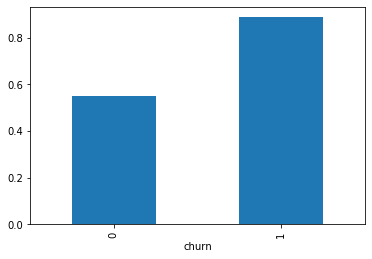

In [69]:
telecom_churn_data_highVal.groupby('churn')['usage_reduced'].mean().plot(kind="bar")

In [70]:
telecom_churn_data_highVal['usage_reduced'].value_counts()

1    17377
0    12624
Name: usage_reduced, dtype: int64

#### Negative Values Treatment

 - As we can see that average revenue columns has the negative values.
 - These values can be negative as the amount that the telecom company pays to the TRAI though the user has not bought any recharge for that month.
 - Hence we keep them as it is with out removing them

In [71]:
telecom_churn_data_highVal.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn,amt_per_rech_6,amt_per_rech_7,amt_per_rech_8,usage_reduced
count,3.000100e+04,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,300

In [72]:
len(telecom_churn_data_highVal[(telecom_churn_data_highVal['arpu_6'] < 0 )
                           | (telecom_churn_data_highVal['arpu_7'] < 0) 
                           | (telecom_churn_data_highVal['arpu_8'] < 0) ])

177

In [73]:
len(telecom_churn_data_highVal[(telecom_churn_data_highVal['arpu_3g_6'] < 0 )
                           | (telecom_churn_data_highVal['arpu_3g_7'] < 0) 
                           | (telecom_churn_data_highVal['arpu_3g_8'] < 0) ])

640

In [74]:
len(telecom_churn_data_highVal[(telecom_churn_data_highVal['arpu_2g_6'] < 0 )
                           | (telecom_churn_data_highVal['arpu_2g_7'] < 0) 
                           | (telecom_churn_data_highVal['arpu_2g_8'] < 0) ])

644

### Outliers Treatment

In [75]:
telecom_churn_data_highVal.describe([0.25, 0.50, 0.75, .99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn,amt_per_rech_6,amt_per_rech_7,amt_per_rech_8,usage_reduced
count,3.000100e+04,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,300

As we can see that most of the columns has the outliers, hence we can treat them through capping which means taking upper limit as 99 percentile and fill the values with that value which are greater than 99 percentile.
 - From the dataset, if we drop them we will loose most of the data and hence we should not perform forceful Outlier removal.

##### Capping the data with respect to the 99 percentile

In [76]:
telecom_churn_data_highVal.pop('mobile_number')

0        7000842753
7        7000701601
8        7001524846
21       7002124215
23       7000887461
            ...    
99981    7000630859
99984    7000661676
99986    7001729035
99988    7002111859
99997    7000498689
Name: mobile_number, Length: 30001, dtype: int64

In [77]:
outlier_cap_columns = [s for s in telecom_churn_data_highVal.columns if s not in (returncolumns('user'))]
outlier_cap_columns.remove('aon_range')
outlier_cap_columns.remove('usage_loc_std')                                                                         

In [78]:
for col in outlier_cap_columns:
    upperlimit = telecom_churn_data_highVal[col].quantile(0.99)
    telecom_churn_data_highVal[col] = telecom_churn_data_highVal[col].apply(lambda x: upperlimit if(x > upperlimit) else x)

In [79]:
telecom_churn_data_highVal.describe([0.25, 0.50, 0.75, .99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn,amt_per_rech_6,amt_per_rech_7,amt_per_rech_8,usage_reduced
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,

After we tread the outliers, we found that og_others columns has all the zero values, let's drop them from the dataset

In [80]:
telecom_churn_data_highVal = telecom_churn_data_highVal.drop(['og_others_7', 'og_others_8'], axis=1)

In [81]:
telecom_churn_data_highVal.shape

(30001, 156)

### Dummy variables for the categorical variables Treatment

In [82]:
cat_var_cols = []
for col in telecom_churn_data_highVal.columns:
    if(len(telecom_churn_data_highVal.loc[:,col].dropna().unique()) <= 3):
        cat_var_cols.append(col)
cat_var_cols.append('aon_range')
cat_var_cols.remove('churn')
#print(cat_var_cols)

In [83]:
for col in cat_var_cols:
    cont = pd.get_dummies(telecom_churn_data_highVal[col],prefix=col,drop_first=True)
    telecom_churn_data_highVal = pd.concat([telecom_churn_data_highVal,cont],axis=1)

In [84]:
telecom_churn_data_highVal = telecom_churn_data_highVal.drop(cat_var_cols, axis=1)

In [85]:
telecom_churn_data_highVal.shape

(30001, 168)

In [86]:
telecom_churn_data_highVal[returncolumns('aon_range')]

,aon_range_1800,aon_range_2700,aon_range_3600,aon_range_4500
0,1,0,0,0
7,0,0,0,0
8,0,0,0,0
21,0,0,0,0
23,0,0,0,0
...,...,...,...,...
99981,0,0,0,0
99984,0,0,0,0
99986,0,1,0,0
99988,0,0,0,0


### Train Test Split

In [87]:
X = telecom_churn_data_highVal.drop(['churn'],axis=1)
y = telecom_churn_data_highVal['churn']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [88]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21000, 167)
(21000,)
(9001, 167)
(9001,)


### Standardising features

As we know that all the features are not standardised and they are not in the same scale. Hence it is mandatory to bring them to standardise as it is very important for the PCA to identify the Principle components

In [89]:
dummy_var_cols = (returncolumns('user') + returncolumns('usage') + returncolumns("range"))
min_max_cols = [c for c in X_train.columns if c not in dummy_var_cols]

##### Standardising on the Train Set

In [90]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[min_max_cols] = scaler.fit_transform(X_train[min_max_cols])
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,amt_per_rech_6,amt_per_rech_7,amt_per_rech_8,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,monthly_2g_6_1.0,monthly_2g_6_2.0,monthly_2g_7_1.0,monthly_2g_7_2.0,monthly_2g_8_1.0,monthly_2g_8_2.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0,usage_loc_std_1,usage_reduced_1,aon_range_1800,aon_range_2700,aon_range_3600,aon_range_4500
39186,0.788216,0.728618,0.402166,0.002644,0.003760,0.002242,0.065291,0.065955,0.044712,0.084570,0.095058,0.110245,0.011551,0.032787,0.023090,0.005356,0.007256,0.005299,0.019024,0.027513,0.018203,0.013578,0.000000,0.000000,0.0,0.228735,0.038993,0.015782,0.021753,0.014830,0.000000,0.000000,0.000000,0.001337,0.005155,0.007002,0.000000,0.000000,0.000000,0.000951,0.003804,0.004788,1.0,1.000000,1.0,0.000000,0.112456,0.015530,0.000000,0.047401,0.046605,0.028896,0.024184,0.053330,0.074003,0.132736,0.141708,0.107676,0.036898,0.047468,0.011832,0.106256,0.123576,0.105804,0.000000,0.000000,0.000000,0.047950,0.084538,0.161945,0.000000,0.000000,0.000000,0.031891,0.055608,0.106709,0.249474,0.197851,0.154472,0.000000,0.0,0.0,1.000000,0.575702,0.234064,0.000000,0.078089,0.000000,0.170213,0.104167,0.066667,0.623316,0.367532,0.281076,0.398,0.459,0.240799,0.607634,0.053435,0.353982,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035953,0.011195,0.024590,0.022177,0.016963,0.017165,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.183413,0.164519,0.200824,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1
39833,0.653201,0.579450,0.304173,0.067336,0.022634,0.018855,0.138044,0.094417,0.121019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064053,0.030024,0.044573,0.244019,0.161532,0.194393,0.138521,0.059308,0.419990,0.0,0.590064,0.000000,0.1

##### Standardising on the Test Set

In [91]:
X_test[min_max_cols] = scaler.transform(X_test[min_max_cols])

In [92]:
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,amt_per_rech_6,amt_per_rech_7,amt_per_rech_8,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,monthly_2g_6_1.0,monthly_2g_6_2.0,monthly_2g_7_1.0,monthly_2g_7_2.0,monthly_2g_8_1.0,monthly_2g_8_2.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0,usage_loc_std_1,usage_reduced_1,aon_range_1800,aon_range_2700,aon_range_3600,aon_range_4500
20296,0.659299,0.635752,0.268538,0.007394,0.002502,0.003701,0.023315,0.006164,0.010195,0.00000,0.0,0.000000,0.00000,0.000000,0.000000,0.003488,0.003152,0.008748,0.039562,0.003968,0.012855,0.040849,0.017289,0.020550,0.001203,0.000000,0.000000,0.029115,0.005235,0.014247,0.006576,0.001200,0.000000,0.002388,0.004227,0.003031,0.024975,0.000000,0.025860,0.006573,0.003923,0.002405,0.0,0.0,0.0,0.018703,0.044588,0.043626,0.000000,0.022349,0.007248,0.010392,0.013428,0.007658,0.004237,0.050605,0.032547,0.021466,0.045121,0.075588,0.124620,0.046422,0.035190,0.032091,0.136462,0.000000,0.000000,0.022023,0.004339,0.010241,0.106267,0.000000,0.000000,0.076674,0.002854,0.006748,0.063571,0.030343,0.029149,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.255319,0.229167,0.088889,0.298822,0.307787,0.129005,0.120,0.150,0.151420,0.045802,0.229008,0.254867,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.035953,0.011195,0.024590,0.022177,0.016963,0.017165,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.140305,0.000000,0.000000,0.000000,0.058620,0.062625,0.069129,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0
8279,0.550951,0.553686,0.181822,0.007380,0.004237,0.004381,0.011438,0.008852,0.001623,0.01682,0.0,0.011978,0.00733,0.023439,0.011849,0.007840,0.000943,0.003164,0.000976,0.003653,0.000074,0.000000,0.000000,0.000000,0.765437,0.355969,0.096774,0.005037,0.002881,

### Model Building

### PCA

In [93]:
pca = PCA(random_state=42)

In [94]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [95]:
pca.components_

array([[-1.58179797e-02, -1.62609397e-02, -1.67004322e-02, ...,
         5.44718426e-03,  7.96030013e-03, -1.09195339e-03],
       [ 4.76031646e-02,  5.45524291e-02,  1.16662323e-01, ...,
         9.16804009e-02,  8.84164718e-02,  1.82520986e-02],
       [ 4.05919713e-02,  6.46665949e-02,  1.32808176e-01, ...,
        -5.70967055e-02, -5.34894932e-02, -1.12234443e-02],
       ...,
       [ 2.31718818e-15, -6.83505137e-16, -1.91522516e-16, ...,
        -2.19715449e-17, -5.34870882e-17, -4.86266184e-17],
       [-0.00000000e+00, -5.33305300e-16, -1.07402356e-16, ...,
        -4.67894829e-20, -1.02054392e-17,  3.32989910e-17],
       [-0.00000000e+00,  1.75951290e-16, -2.75084640e-16, ...,
         4.99384300e-17,  8.93035074e-17,  1.67929432e-16]])

In [96]:
pca.explained_variance_ratio_

array([2.22644327e-01, 8.01214678e-02, 6.32746854e-02, 5.31167829e-02,
       4.03344297e-02, 3.70068125e-02, 2.72630052e-02, 2.69399521e-02,
       2.34158280e-02, 2.24979307e-02, 2.03175551e-02, 1.96133162e-02,
       1.67043581e-02, 1.54059969e-02, 1.42059223e-02, 1.27685083e-02,
       1.16841558e-02, 1.11424255e-02, 1.03489228e-02, 1.01461307e-02,
       9.49717318e-03, 9.26929647e-03, 8.91727070e-03, 8.79067849e-03,
       8.53956813e-03, 8.23002665e-03, 7.66104121e-03, 7.36225501e-03,
       6.98919720e-03, 6.65635799e-03, 6.48719058e-03, 6.23906257e-03,
       5.86956033e-03, 5.68852857e-03, 5.23253200e-03, 5.08330013e-03,
       4.74831998e-03, 4.42719002e-03, 4.20464186e-03, 4.03791633e-03,
       3.93346753e-03, 3.90920659e-03, 3.80286898e-03, 3.65691422e-03,
       3.59893209e-03, 3.57093549e-03, 3.51327153e-03, 3.45410473e-03,
       3.32150997e-03, 3.31156996e-03, 3.23282870e-03, 3.07210971e-03,
       2.97625703e-03, 2.92843634e-03, 2.88508912e-03, 2.72135493e-03,
      

In [97]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

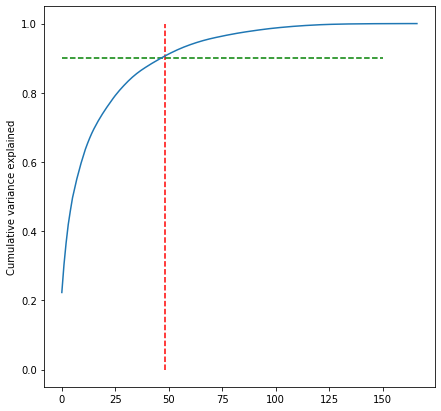

In [98]:
fig = plt.figure(figsize=[7,7])
plt.vlines(x=48, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=150, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [99]:
pca_again = PCA(0.90)

In [100]:
X_train_pca = pca_again.fit_transform(X_train)
X_train_pca.shape

(21000, 48)

In [101]:
X_train_pca

array([[-1.14977114,  0.29634445, -0.70413778, ...,  0.92360779,
         0.52704165,  0.41582487],
       [ 1.08876575,  0.30533065, -0.36455804, ...,  0.00681435,
         0.10702758,  0.03884333],
       [ 0.20918157, -0.23533561, -0.95052276, ..., -0.03613357,
         0.01205099, -0.09952918],
       ...,
       [-0.18916631, -0.4955314 , -1.09134178, ...,  0.05092509,
        -0.13182779,  0.11111798],
       [-1.42761328,  0.41362891, -0.7510643 , ..., -0.39381113,
        -0.28429314,  0.51380898],
       [-1.99025518,  0.79333077,  0.67592225, ...,  0.13789502,
        -0.02663246,  0.04355188]])

As per the above screen plot and the shape of the data set return from the PCA for the 90% variance it is 48 Principal Components. Hence we consider and start transforming the train and test data sets into principal components datasets

In [102]:
X_test_pca = pca_again.transform(X_test)
X_test_pca.shape

(9001, 48)

### Handling/Oversampling High Imbalance in Data

- As we can see, the predictor Column which has the high imbalance(data is not distributed between) - there will be a chances of oversampling. 
- Hence we have to balance the data by using some imbalancing techniques(SMOTE) - which adds duplicate records and balance between the predictor variables.

In [103]:
X_train_pca

array([[-1.14977114,  0.29634445, -0.70413778, ...,  0.92360779,
         0.52704165,  0.41582487],
       [ 1.08876575,  0.30533065, -0.36455804, ...,  0.00681435,
         0.10702758,  0.03884333],
       [ 0.20918157, -0.23533561, -0.95052276, ..., -0.03613357,
         0.01205099, -0.09952918],
       ...,
       [-0.18916631, -0.4955314 , -1.09134178, ...,  0.05092509,
        -0.13182779,  0.11111798],
       [-1.42761328,  0.41362891, -0.7510643 , ..., -0.39381113,
        -0.28429314,  0.51380898],
       [-1.99025518,  0.79333077,  0.67592225, ...,  0.13789502,
        -0.02663246,  0.04355188]])

In [104]:
y_train

39186    0
39833    0
38778    0
43026    0
12271    0
        ..
40261    0
81456    0
47136    0
77825    0
18732    0
Name: churn, Length: 21000, dtype: int64

In [105]:
X_train_resampled, y_train_resampled = SMOTE(random_state=42, k_neighbors=5).fit_resample(X_train_pca, y_train)

In [106]:
X_train_resampled.shape

(38618, 48)

In [107]:
y_train_resampled.shape

(38618,)

In [108]:
y_train_resampled.value_counts()

1    19309
0    19309
Name: churn, dtype: int64

In [206]:
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from imblearn.metrics import sensitivity_specificity_support
def sensitivityspecificity(y_test, y_test_predicted):
    sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_test_predicted, average='binary')
    return "Sensitivity: " + str(round(sensitivity, 2)) + "\n" + "Specificity: " + str(round(specificity, 2))
def precision(y_test, y_test_predicted):
    precision = metrics.precision_score(y_test, y_test_predicted)
    return "precision: " + str(round(precision, 2))
def recall(y_test, y_test_predicted):
    recall = metrics.recall_score(y_test, y_test_predicted)
    return "recall: " + str(round(recall,2)) 
def confusionMatrix(y_test, y_test_predicted):
    return metrics.confusion_matrix(y_true=y_test, y_pred=y_test_predicted)
def accuracy(y_test, y_test_predicted):
    accuracy = metrics.accuracy_score(y_test, y_test_predicted)
    return "accuracy: " + str(accuracy)
def returngridsearchcvmodelpcaresampled(model, hyper_parameters, scoring, folds, verbose, return_train_score, refit):
    model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_parameters, 
                        scoring= scoring, 
                        cv = folds, 
                        verbose = verbose,
                        return_train_score=return_train_score,
                        n_jobs=-1,
                        refit=refit)
    return model_cv.fit(X_train_resampled, y_train_resampled)
def classificationreport(y_test, y_test_predicted):
    return metrics.classification_report(y_true=y_test, y_pred=y_test_predicted)
def rocaucscore(y_test, y_test_predicted):
    roc = metrics.roc_auc_score(y_test, y_test_predicted)
    return "AUC: " + str(roc * 100.0)

### Logistic Regression

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [112]:
log_reg_pca = LogisticRegression(solver='liblinear')

In [113]:
model_logreg_pca = log_reg_pca.fit(pd.DataFrame(X_train_resampled), pd.DataFrame(y_train_resampled))
model_logreg_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [114]:
pred_probs_test = model_logreg_pca.predict_proba(X_test_pca)
print(pred_probs_test[0:10])

[[0.42320422 0.57679578]
 [0.5359234  0.4640766 ]
 [0.89032547 0.10967453]
 [0.74913403 0.25086597]
 [0.2049701  0.7950299 ]
 [0.87526988 0.12473012]
 [0.86992098 0.13007902]
 [0.97035529 0.02964471]
 [0.96141388 0.03858612]
 [0.73622981 0.26377019]]


In [115]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.89'

##### Making Predictions

In [116]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
20296,1
8279,1
72269,0
65602,0
42758,1


In [117]:
# Converting to column dataframe
y_pred_df = pd.DataFrame(pred_probs_test)
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.576796
1,0.464077
2,0.109675
3,0.250866
4,0.795030


In [118]:
# Appending y_test_df and y_pred_1
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_Prob'})
# Rearranging the columns
#y_pred_final = y_pred_final.reindex_axis(['CustID','Churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,churn,churn_Prob
0,1,0.576796
1,1,0.464077
2,0,0.109675
3,0,0.250866
4,1,0.795030


In [119]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,churn,churn_Prob,predicted
0,1,0.576796,1
1,1,0.464077,0
2,0,0.109675,0
3,0,0.250866,0
4,1,0.795030,1


In [120]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted )
confusion

array([[6897, 1354],
       [ 128,  622]], dtype=int64)

In [121]:
metrics.accuracy_score(y_pred_final.churn, y_pred_final.predicted)

0.8353516275969337

In [122]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

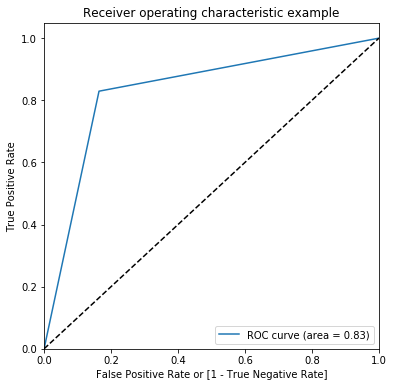

(array([0.        , 0.16410132, 1.        ]),
 array([0.        , 0.82933333, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [123]:
draw_roc(y_pred_final.churn, y_pred_final.predicted)

In [124]:
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.churn, y_pred_final.churn_Prob))

'0.89'

In [127]:
sensitivityspecificity(y_pred_final.churn, y_pred_final.predicted)

'Sensitivity: 0.83\nSpecificity: 0.84'

In [128]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90      8251
           1       0.31      0.83      0.46       750

    accuracy                           0.84      9001
   macro avg       0.65      0.83      0.68      9001
weighted avg       0.93      0.84      0.87      9001



##### Step 10: Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [129]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_Prob.map(lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.576796,1,1,1,1,1,1,1,0,0,0,0
1,1,0.464077,0,1,1,1,1,1,0,0,0,0,0
2,0,0.109675,0,1,1,0,0,0,0,0,0,0,0
3,0,0.250866,0,1,1,1,0,0,0,0,0,0,0
4,1,0.795030,1,1,1,1,1,1,1,1,1,0,0


In [131]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.083324  1.000000  0.000000
0.1   0.1  0.489946  0.952000  0.447946
0.2   0.2  0.631596  0.922667  0.605139
0.3   0.3  0.724253  0.890667  0.709126
0.4   0.4  0.784913  0.857333  0.778330
0.5   0.5  0.835352  0.829333  0.835899
0.6   0.6  0.873347  0.780000  0.881833
0.7   0.7  0.899789  0.713333  0.916737
0.8   0.8  0.916454  0.618667  0.943522
0.9   0.9  0.926897  0.373333  0.977215


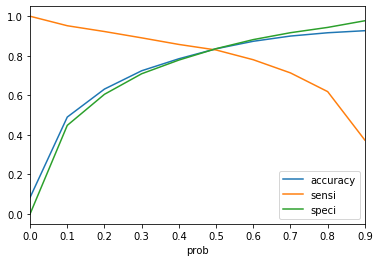

In [132]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.5 is the optimum point to take it as a cutoff probability.

Evaluating Error Terms
Let's now evaluate the model in terms of its assumptions. We should test that:

The error terms are normally distributed with mean approximately 0
There is little correlation between the predictors
Homoscedasticity, i.e. the 'spread' or 'variance' of the error term (y_true-y_pred) is constant

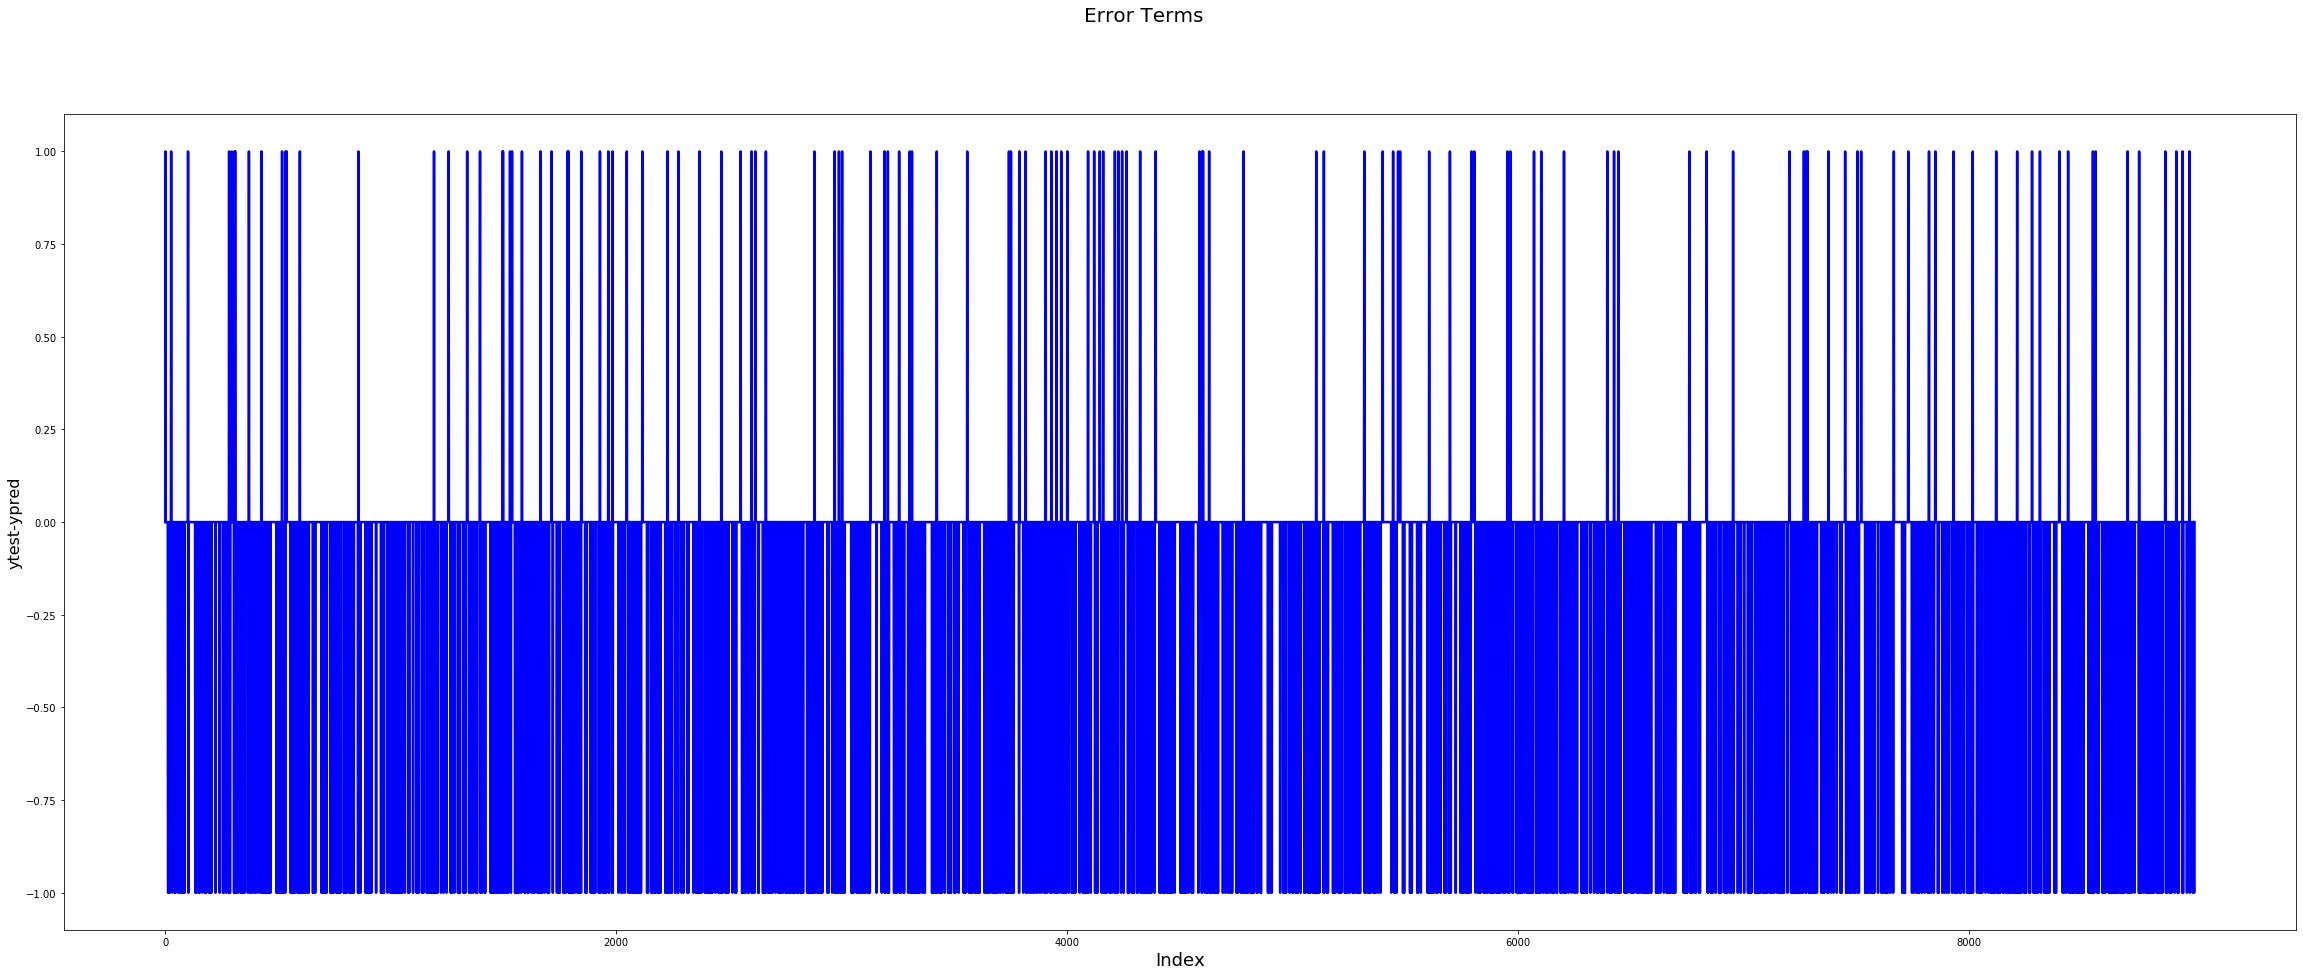

In [133]:
%matplotlib inline
import matplotlib.pyplot as plt
# Error terms
c = [i for i in range(len(y_pred_final.predicted))]
fig = plt.figure(figsize=(40, 15))
plt.plot(c, y_pred_final.churn-y_pred_final.predicted, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label
plt.show()

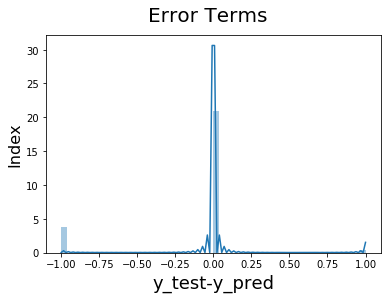

In [134]:
%matplotlib inline
import matplotlib.pyplot as plt
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_pred_final.churn-y_pred_final.predicted),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label
plt.show()

In [135]:
np.mean(y_pred_final.churn-y_pred_final.predicted)

-0.13620708810132207

##### Inference for Logisitc Regression with PCA
With Logistic Regression using PCA we are getting a model with 88% Senstivity/Recall and Mean error is -0.13 which pretty good now lets evaluate other models

### Extreme Gradient Boosting with PCA

##### Modelling

In [136]:
print(X_train_resampled.shape)
print(y_train_resampled.shape)
print(X_test_pca.shape)
print(y_test.shape)

(38618, 48)
(38618,)
(9001, 48)
(9001,)


In [137]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [138]:
xgb_pca = XGBClassifier()

In [139]:
xgb_pca.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
              verbosity=1)

In [143]:
# make predictions for test data
# use predict_proba since we need probabilities to compute aucxgb_
xgb_y_pred = xgb_pca.predict_proba(X_test_pca)
xgb_y_pred[:10]

array([[0.47358435, 0.52641565],
       [0.64276254, 0.35723743],
       [0.77376056, 0.22623946],
       [0.7635664 , 0.23643364],
       [0.32623237, 0.6737676 ],
       [0.89786786, 0.10213212],
       [0.8782551 , 0.12174489],
       [0.8863492 , 0.11365078],
       [0.9329728 , 0.06702719],
       [0.73065275, 0.26934725]], dtype=float32)

In [154]:
print(rocaucscore(y_test, xgb_y_pred[:, 1]))

AUC: 88.54041934310992


The roc_auc in this case is about 0.88% with default hyperparameters. 

Let's now try tuning the hyperparameters using k-fold CV. We'll then use grid search CV to find the optimal values of hyperparameters.

##### GridSearchCV to tune hyperparameters of XGBoost

We have tried to tune the below hyperparameters which helps the better performance of the model

- ```Max Depth```
- ```N Estimators```
- ```Learning Rate```
- ```Sub Sample```


In [164]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

In [ ]:
# specify range of hyperparameters
hyper_parameters = {'max_depth': np.arange(4,20,2).tolist()}          


xgb_model = XGBClassifier()

model_grid_xgb_maxdepth = returngridsearchcvmodelpcaresampled(xgb_model, hyper_parameters, ['accuracy', 'recall'], folds, 3, True, 'accuracy')

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


##### Plotting max_depth with the accuracy

In [197]:
# scores of GridSearch CV
scores = model_grid_xgb_maxdepth.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_train_accuracy,split1_train_accuracy,split2_train_accuracy,split3_train_accuracy,split4_train_accuracy,mean_train_accuracy,std_train_accuracy,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_train_recall,split1_train_recall,split2_train_recall,split3_train_recall,split4_train_recall,mean_train_recall,std_train_recall
0,992.930064,211.500235,1.797206,0.158989,20,{'max_depth': 20},0.956629,0.954039,0.955981,0.955846,0.957788,0.956057,0.001220,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.978673,0.975648,0.982493,0.976959,0.978050,0.978364,0.002306,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,1608.948160,2629.670860,0.534180,0.534795,22,{'max_depth': 22},0.954557,0.955593,0.956370,0.953257,0.956364,0.955228,0.001189,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.976303,0.976684,0.980664,0.974142,0.977795,0.977118,0.002132,6,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,3523.032698,3572.569890,0.827840,0.763438,24,{'max_depth': 24},0.954687,0.954428,0.953651,0.954422,0.957529,0.954943,0.001339,9,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.977883,0.975130,0.979357,0.975422,0.978560,0.977271,0.001697,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,641.779459,423.170430,1.311678,0.847226,26,{'max_depth': 26},0.952486,0.954039,0.957017,0.955069,0.958047,0.955332,0.002003,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.974460,0.972798,0.982493,0.976703,0.977540,0.976799,0.003300,10,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,218.319399,146.197190,0.374385,0.099012,28,{'max_depth': 28},0.953780,0.953780,0.956111,0.954292,0.957400,0.955073,0.001445,7,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.976567,0.975130,0.981709,0.974654,0.976774,0.976967,0.002506,8,1.0,1.0,1.0,1.0,1.0,1.0,0.0


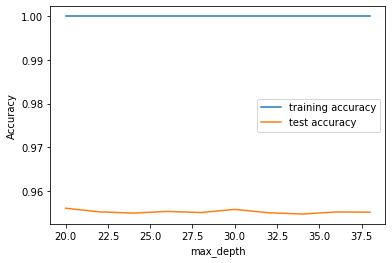

In [199]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_accuracy"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_accuracy"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

You can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease.

Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.

In [172]:
# specify range of hyperparameters
hyper_parameters = {'learning_rate': [0.2, 0.6]}          


# specify model
xgb_model = XGBClassifier()

# set up GridSearchCV()
model_grid_xgb_learning_rate = returngridsearchcvmodelpcaresampled(xgb_model, hyper_parameters, ['accuracy', 'recall'], folds, 3, True, 'accuracy')     


Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] learning_rate=0.2 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.2, accuracy=(train=0.885, test=0.870), recall=(train=0.899, test=0.884), total=  25.2s
[CV] learning_rate=0.2 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.4s remaining:    0.0s


[CV]  learning_rate=0.2, accuracy=(train=0.886, test=0.871), recall=(train=0.901, test=0.885), total=  25.2s
[CV] learning_rate=0.2 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   50.8s remaining:    0.0s


[CV]  learning_rate=0.2, accuracy=(train=0.885, test=0.863), recall=(train=0.900, test=0.883), total=  26.7s
[CV] learning_rate=0.2 ...............................................
[CV]  learning_rate=0.2, accuracy=(train=0.884, test=0.869), recall=(train=0.900, test=0.881), total=  26.4s
[CV] learning_rate=0.2 ...............................................
[CV]  learning_rate=0.2, accuracy=(train=0.882, test=0.877), recall=(train=0.897, test=0.887), total=  28.8s
[CV] learning_rate=0.6 ...............................................
[CV]  learning_rate=0.6, accuracy=(train=0.930, test=0.897), recall=(train=0.949, test=0.921), total=  25.8s
[CV] learning_rate=0.6 ...............................................
[CV]  learning_rate=0.6, accuracy=(train=0.930, test=0.902), recall=(train=0.950, test=0.924), total=  25.5s
[CV] learning_rate=0.6 ...............................................
[CV]  learning_rate=0.6, accuracy=(train=0.928, test=0.890), recall=(train=0.949, test=0.922), total

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  4.5min finished


##### Plotting learning_rate with the accuracy

In [200]:
# scores of GridSearch CV
scores = model_grid_xgb_learning_rate.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_train_accuracy,split1_train_accuracy,split2_train_accuracy,split3_train_accuracy,split4_train_accuracy,mean_train_accuracy,std_train_accuracy,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_train_recall,split1_train_recall,split2_train_recall,split3_train_recall,split4_train_recall,mean_train_recall,std_train_recall
0,26.404438,1.326878,0.060631,0.007391,0.2,{'learning_rate': 0.2},0.870016,0.870792,0.862895,0.869092,0.876602,0.869879,0.004369,2,0.884929,0.885965,0.885220,0.884253,0.882376,0.884549,0.001217,0.884150,0.885233,0.883460,0.881208,0.886677,0.884146,0.001827,2,0.899362,0.900641,0.900078,0.900409,0.896628,0.899423,0.001463
1,26.748915,2.302471,0.056053,0.003064,0.6,{'learning_rate': 0.6},0.897462,0.901735,0.890342,0.897708,0.904053,0.898260,0.004675,1,0.929630,0.929825,0.927591,0.927076,0.925716,0.927968,0.001563,0.921011,0.923575,0.921871,0.911930,0.924196,0.920517,0.004443,1,0.949133,0.949964,0.949038,0.946439,0.947632,0.948441,0.001250


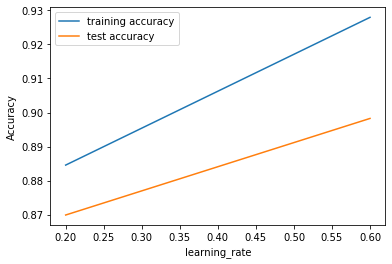

In [202]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_learning_rate"], 
         scores["mean_train_accuracy"], 
         label="training accuracy")
plt.plot(scores["param_learning_rate"], 
         scores["mean_test_accuracy"], 
         label="test accuracy")
plt.xlabel("learning_rate")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

As we can see the training accuracy starts reducing from 0.2 to 0.6. Hence we have taken 0.6 as the best score.

In [175]:
# specify range of hyperparameters
hyper_parameters = {'n_estimators': np.arange(700,1000,50).tolist()}          


# specify model
xgb_model = XGBClassifier()

# set up GridSearchCV()
n_jobs=01 = returngridsearchcvmodelpcaresampled(xgb_model, hyper_parameters, ['accuracy', 'recall'], folds, 3, True, 'accuracy')     


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_estimators=700 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=700, accuracy=(train=0.940, test=0.906), recall=(train=0.960, test=0.929), total=22.0min
[CV] n_estimators=700 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 22.2min remaining:    0.0s


[CV]  n_estimators=700, accuracy=(train=0.940, test=0.912), recall=(train=0.963, test=0.940), total= 7.2min
[CV] n_estimators=700 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 29.4min remaining:    0.0s


[CV]  n_estimators=700, accuracy=(train=0.940, test=0.902), recall=(train=0.962, test=0.934), total=11.5min
[CV] n_estimators=700 ................................................
[CV]  n_estimators=700, accuracy=(train=0.938, test=0.910), recall=(train=0.959, test=0.928), total= 3.4min
[CV] n_estimators=700 ................................................
[CV]  n_estimators=700, accuracy=(train=0.940, test=0.917), recall=(train=0.961, test=0.938), total=15.6min
[CV] n_estimators=750 ................................................
[CV]  n_estimators=750, accuracy=(train=0.943, test=0.911), recall=(train=0.964, test=0.934), total=20.7min
[CV] n_estimators=750 ................................................
[CV]  n_estimators=750, accuracy=(train=0.943, test=0.916), recall=(train=0.966, test=0.944), total=20.7min
[CV] n_estimators=750 ................................................
[CV]  n_estimators=750, accuracy=(train=0.943, test=0.904), recall=(train=0.965, test=0.936), total=19.0m

KeyboardInterrupt: 

In [ ]:
# specify range of hyperparameters
hyper_parameters = {"subsample": [0.3, 0.6, 0.9]}          


xgb_model = XGBClassifier()

model_grid_xgb_subsample = returngridsearchcvmodelpcaresampled(xgb_model, hyper_parameters, ['accuracy', 'recall'], folds, 1, True, 'accuracy')

##### Print the best parameters from the GridSearch Results

In [180]:
print(model_grid_xgb_maxdepth.best_params_)
print(model_grid_xgb_learning_rate.best_params_)

{'max_depth': 20}
{'learning_rate': 0.6}


In [181]:
print("n_estimators:800")
print("subsample:0.3")

n_estimators:800
subsample:0.3


Similarly, we have have done grid search on the n_estimators and sub samples and we have got the above results.

Let's model with respect to these parameters and check the results.

In [189]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.6,
          'max_depth': 20, 
          'n_estimators':1000,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
final_xgb_model = XGBClassifier(params = params)
final_xgb_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              objective='binary:logistic',
              params={'learning_rate': 0.6, 'max_depth': 20,
                      'n_estimators': 1000, 'objective': 'binary:logistic',
                      'subsample': 0.3},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='auto', verbosity=1)

In [194]:
# predict
y_pred_final_xgb_model = final_xgb_model.predict(X_test_pca)
y_pred_final_xgb_model[:10]

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [193]:
print(rocaucscore(y_test, y_pred_final_xgb_model[:, 1]))

AUC: 88.54041934310992


In [196]:
print("Confusion Matrix: ", confusionMatrix(y_test, y_pred_final_xgb_model))
print(accuracy(y_test, y_pred_final_xgb_model))
print(sensitivityspecificity(y_test, y_pred_final_xgb_model))
print(precision(y_test, y_pred_final_xgb_model))
print(recall(y_test, y_pred_final_xgb_model))
print(classificationreport(y_test, y_pred_final_xgb_model))

Confusion Matrix:  [[7012 1239]
 [ 167  583]]
accuracy: 0.843795133874014
Sensitivity: 0.78
Specificity: 0.85
precision: 0.32
recall: 0.78
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      8251
           1       0.32      0.78      0.45       750

    accuracy                           0.84      9001
   macro avg       0.65      0.81      0.68      9001
weighted avg       0.92      0.84      0.87      9001



Evaluating Error Terms
Let's now evaluate the model in terms of its assumptions. We should test that:

The error terms are normally distributed with mean approximately 0
There is little correlation between the predictors
Homoscedasticity, i.e. the 'spread' or 'variance' of the error term (y_true-y_pred) is constant

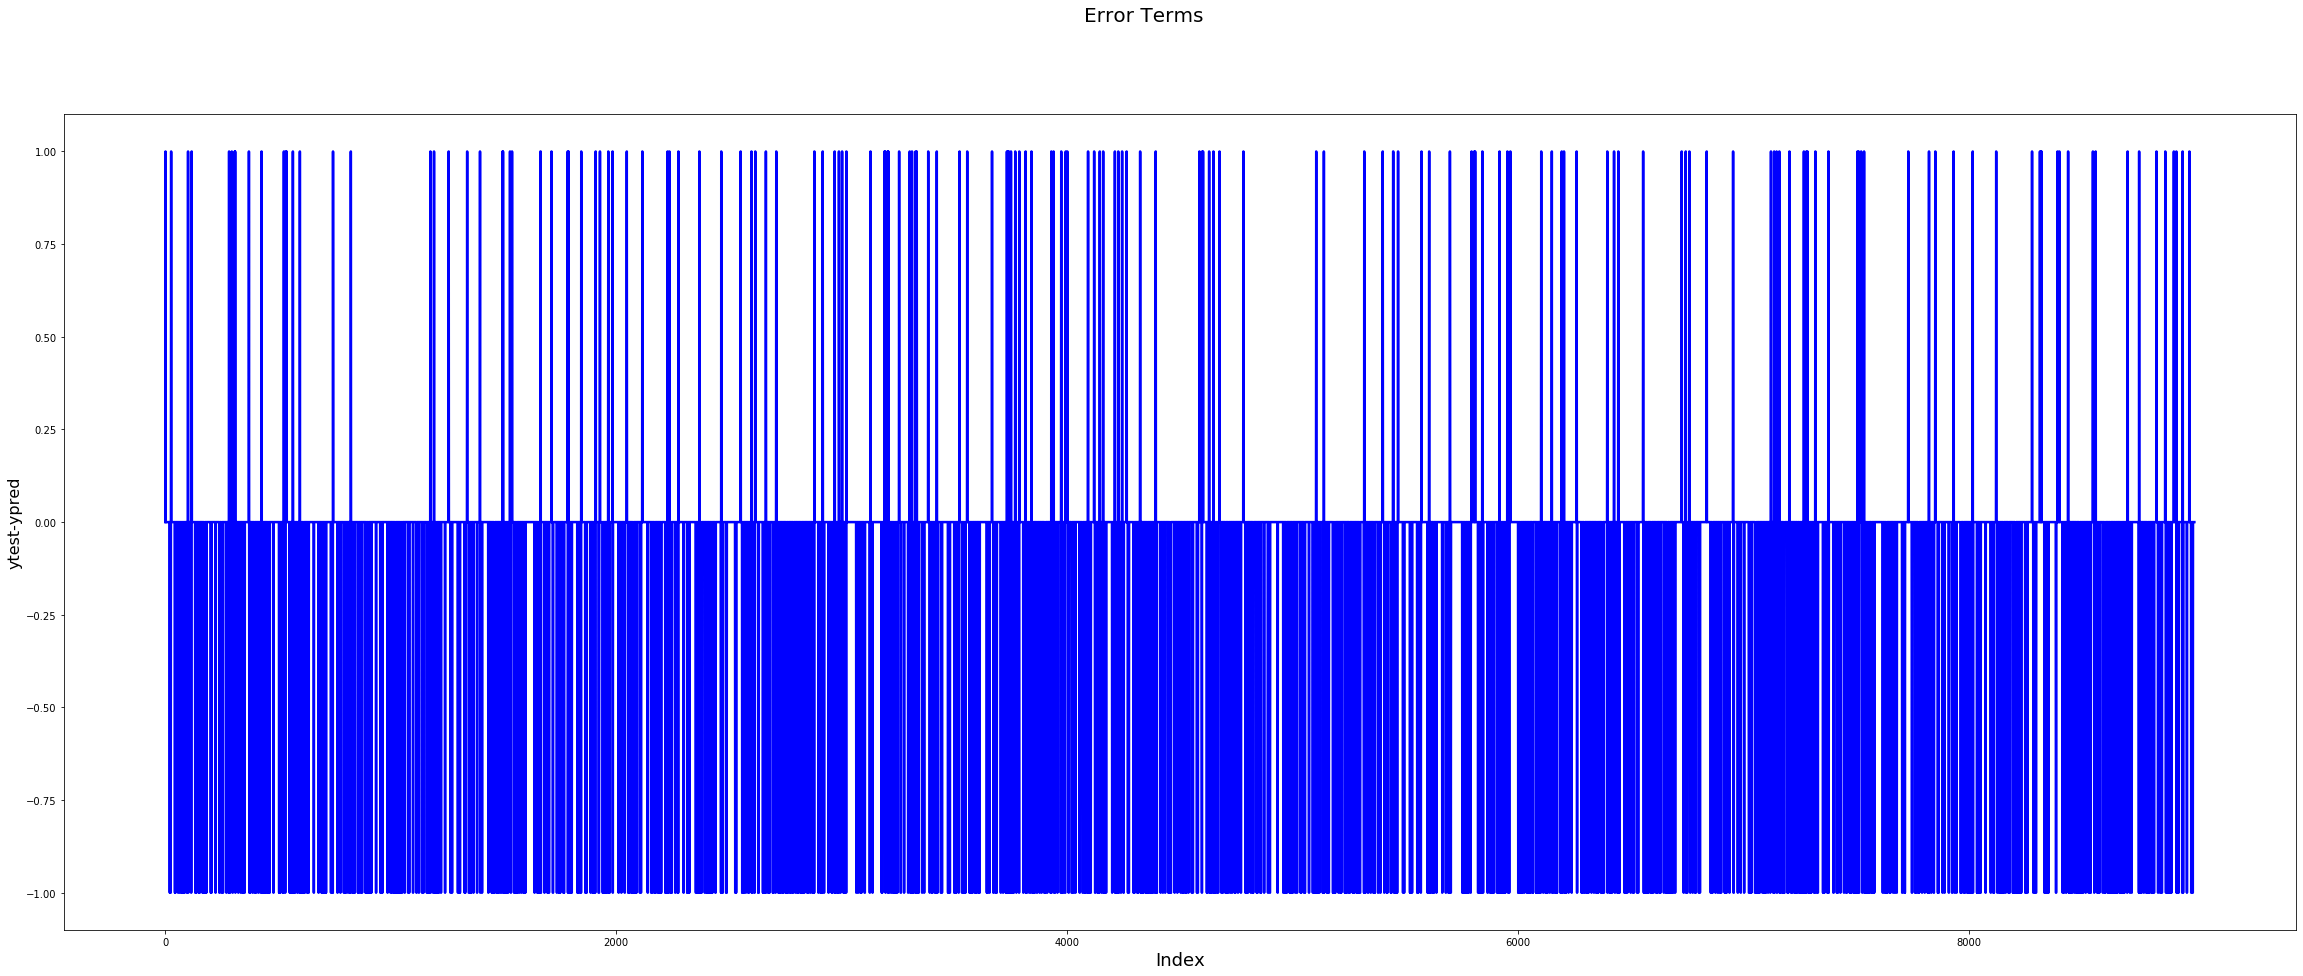

In [203]:
%matplotlib inline
import matplotlib.pyplot as plt
# Error terms
c = [i for i in range(len(y_pred_final_xgb_model))]
fig = plt.figure(figsize=(40, 15))
plt.plot(c, y_test-y_pred_final_xgb_model, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label
plt.show()

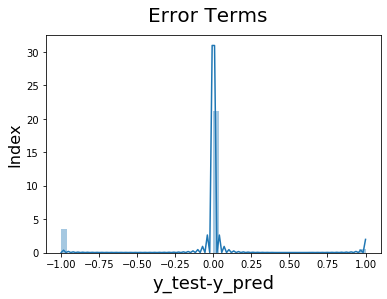

In [204]:
%matplotlib inline
import matplotlib.pyplot as plt
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred_final_xgb_model),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label
plt.show()

In [ ]:
np.mean(y_test-y_pred_final_xgb_model)

### SVM with PCA

#####  Model Building
 using rbf kernel, C=1, default value of gamma

In [243]:
from sklearn.svm import SVC

In [244]:
model_svc_pca = SVC(C = 1, kernel='rbf')
model_svc_pca.fit(X_train_resampled, y_train_resampled)
y_pred_pca_svc = model_svc_pca.predict(X_test_pca)

In [260]:
print("Confusion Matrix: ", confusionMatrix(y_test, y_pred_pca_svc))
print(accuracy(y_test, y_pred_pca_svc))
print(sensitivityspecificity(y_test, y_pred_pca_svc))
print(precision(y_test, y_pred_pca_svc))
print(recall(y_test, y_pred_pca_svc))
print(classificationreport(y_test, y_pred_pca_svc))

Confusion Matrix:  [[7413  838]
 [ 201  549]]
accuracy: 0.8845683812909677
Sensitivity: 0.73
Specificity: 0.9
precision: 0.4
recall: 0.73
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      8251
           1       0.40      0.73      0.51       750

    accuracy                           0.88      9001
   macro avg       0.68      0.82      0.72      9001
weighted avg       0.93      0.88      0.90      9001

